# Spatial data operations
https://py.geocompx.org/03-spatial-operations

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.ndimage
import scipy.stats
import shapely
import geopandas as gpd
import rasterio
import rasterio.plot
import rasterio.merge
import rasterio.features

In [2]:
nz = gpd.read_file('data/nz.gpkg')
nz_height = gpd.read_file('data/nz_height.gpkg')
world = gpd.read_file('data/world.gpkg')
cycle_hire = gpd.read_file('data/cycle_hire.gpkg')
cycle_hire_osm = gpd.read_file('data/cycle_hire_osm.gpkg')
src_elev = rasterio.open('output/elev.tif')
src_landsat = rasterio.open('data/landsat.tif')
src_grain = rasterio.open('output/grain.tif')

## 3.2 spatial operations on vector data

In [3]:
canterbury = nz[nz['Name'] == 'Canterbury']
canterbury

,Name,Island,Land_area,Population,Median_income,Sex_ratio,geometry
10,Canterbury,South,44504.499091,612000.0,30100,0.975327,"MULTIPOLYGON (((1686901.914 5353232.66, 167999..."


In [4]:
nz

,Name,Island,Land_area,Population,Median_income,Sex_ratio,geometry
0,Northland,North,12500.561149,175500.0,23400,0.942453,"MULTIPOLYGON (((1745493.196 6001802.169, 17405..."
1,Auckland,North,4941.572557,1657200.0,29600,0.944286,"MULTIPOLYGON (((1803822.103 5900006.143, 17914..."
2,Waikato,North,23900.036383,460100.0,27900,0.952050,"MULTIPOLYGON (((1860345.005 5859664.761, 18578..."
3,Bay of Plenty,North,12071.144689,299900.0,26200,0.928039,"MULTIPOLYGON (((2049387.29 5832785.434, 205101..."
4,Gisborne,North,8385.826619,48500.0,24400,0.934973,"MULTIPOLYGON (((2024489.357 5674919.854, 20190..."
5,Hawke's Bay,North,14137.524441,164000.0,26100,0.923838,"MULTIPOLYGON (((2024489.357 5674919.854, 20241..."
6,Taranaki,North,7254.480433,118000.0,29100,0.956936,"MULTIPOLYGON (((1740438.216 5714538.134, 17438..."
7,Manawatu-Wanganui,North,22220.608387,234500.0,25000,0.938773,"MULTIPOLYGON (((1866732.458 5664323.109, 18689..."
8,Wellington,North,8048.552772,513900.0,32700,0.933552,"MULTIPOLYGON (((1881590.326 5489434.391, 18756..."
9,West Coast,South,23245.455880,32400.0,26900,1.013907,"MULTIPOLYGON (((1557042.169 5319333.386, 15542..."


In [5]:
canterbury.explore()

In [6]:
nz_height.explore()

In [7]:
sel = nz_height.intersects(canterbury.geometry.iloc[0])
sum(np.uint(sel))

np.uint64(70)

In [8]:
canterbury_height = nz_height[sel]
canterbury_height

,t50_fid,elevation,geometry
4,2362630,2749,POINT (1378169.6 5158491.453)
5,2362814,2822,POINT (1389460.041 5168749.086)
6,2362817,2778,POINT (1390166.225 5169466.158)
7,2363991,3004,POINT (1372357.036 5172728.743)
8,2363993,3114,POINT (1372062.487 5173236.285)
...,...,...,...
90,2365400,2723,POINT (1436552.349 5197470.702)
91,2365454,2706,POINT (1438695.851 5200244.307)
92,2380298,2877,POINT (1652788.127 5348984.469)
93,2380300,2711,POINT (1654213.379 5349962.973)


<Axes: >

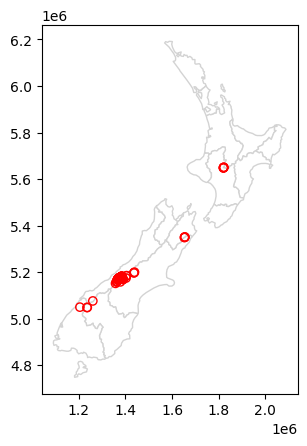

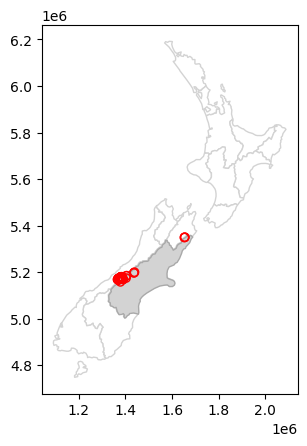

In [9]:
# Original
base = nz.plot(color='white', edgecolor='lightgrey')
nz_height.plot(ax=base, color='None', edgecolor='red')

# Subset (intersects)
base = nz.plot(color='white', edgecolor='lightgrey')
canterbury.plot(ax=base, color='lightgrey', edgecolor='darkgrey')
canterbury_height.plot(ax=base, color='None', edgecolor='red')

In [10]:
sel = nz_height.disjoint(canterbury.geometry.iloc[0])
canterbury_height2 = nz_height[sel]

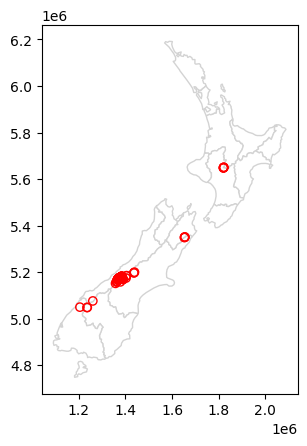

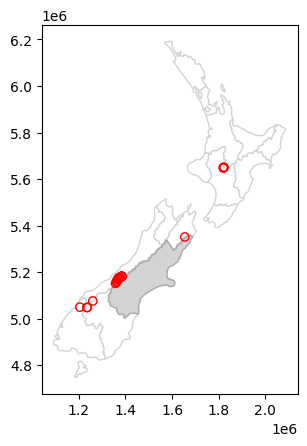

In [11]:
# Original
base = nz.plot(color='white', edgecolor='lightgrey')
nz_height.plot(ax=base, color='None', edgecolor='red');
# Subset (disjoint)
base = nz.plot(color='white', edgecolor='lightgrey')
canterbury.plot(ax=base, color='lightgrey', edgecolor='darkgrey')
canterbury_height2.plot(ax=base, color='None', edgecolor='red');

In [12]:
canterbury_southland = nz[nz['Name'].isin(['Canterbury', 'Southland'])]
sel = nz_height.intersects(canterbury_southland.union_all())
canterbury_southland_height = nz_height[sel]
canterbury_southland_height

,t50_fid,elevation,geometry
0,2353944,2723,POINT (1204142.603 5049971.287)
4,2362630,2749,POINT (1378169.6 5158491.453)
5,2362814,2822,POINT (1389460.041 5168749.086)
6,2362817,2778,POINT (1390166.225 5169466.158)
7,2363991,3004,POINT (1372357.036 5172728.743)
...,...,...,...
90,2365400,2723,POINT (1436552.349 5197470.702)
91,2365454,2706,POINT (1438695.851 5200244.307)
92,2380298,2877,POINT (1652788.127 5348984.469)
93,2380300,2711,POINT (1654213.379 5349962.973)


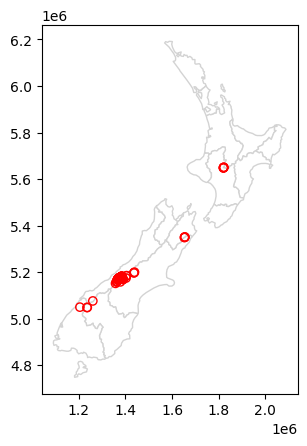

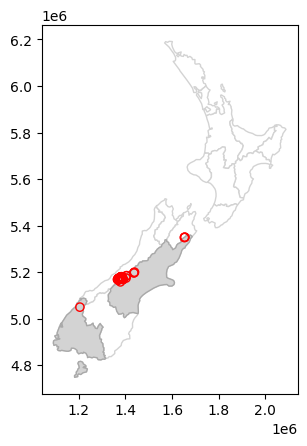

In [13]:
# Original
base = nz.plot(color='white', edgecolor='lightgrey')
nz_height.plot(ax=base, color='None', edgecolor='red');
# Subset by intersection with two polygons
base = nz.plot(color='white', edgecolor='lightgrey')
canterbury_southland.plot(ax=base, color='lightgrey', edgecolor='darkgrey')
canterbury_southland_height.plot(ax=base, color='None', edgecolor='red');

### 3.2.2 Topological relations

In [14]:
points = gpd.GeoSeries([
  shapely.Point(0.2,0.1), 
  shapely.Point(0.7,0.2), 
  shapely.Point(0.4,0.8)
])
line = gpd.GeoSeries([
  shapely.LineString([(0.4,0.2), (1,0.5)])
])
poly = gpd.GeoSeries([
  shapely.Polygon([(0,0), (0,1), (1,1), (1,0.5), (0,0)])
])

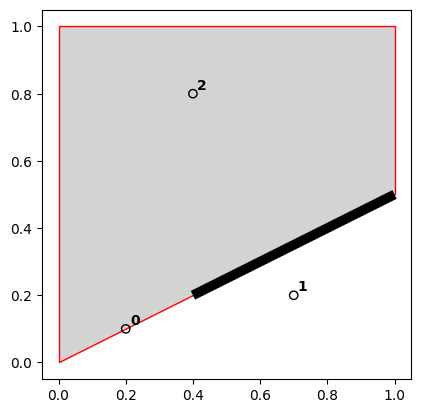

In [15]:
base = poly.plot(color='lightgrey', edgecolor='red')
line.plot(ax=base, color='black', linewidth=7)
points.plot(ax=base, color='none', edgecolor='black')

for i in enumerate(points):
    base.annotate(
        i[0], xy=(i[1].x, i[1].y), 
        xytext=(3, 3), textcoords='offset points', weight='bold'
    )

In [16]:
points.intersects(poly.iloc[0])

0     True
1    False
2     True
dtype: bool

In [17]:
poly2 = gpd.GeoSeries([
  shapely.Polygon([(0,0), (0,1), (1,1), (1,0.5), (0,0)]),
  shapely.Polygon([(0,0), (1,0.5), (1,0), (0,0)])    
])

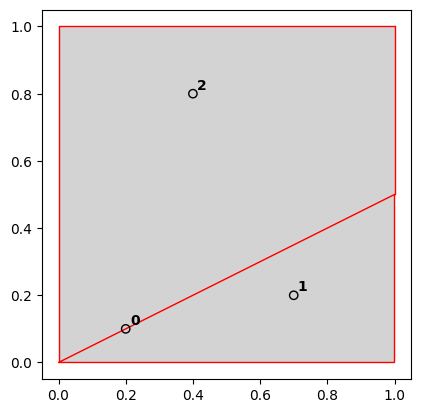

In [18]:
base = poly2.plot(color='lightgrey', edgecolor='red')
points.plot(ax=base, color='none', edgecolor='black')
for i in enumerate(points):
    base.annotate(
        i[0], xy=(i[1].x, i[1].y), 
        xytext=(3, 3), textcoords='offset points', weight='bold'
    )

In [19]:
points.apply(lambda x: poly2.intersects(x))

,0,1
0,True,True
1,False,True
2,True,False


In [20]:
poly2

0    POLYGON ((0 0, 0 1, 1 1, 1 0.5, 0 0))
1         POLYGON ((0 0, 1 0.5, 1 0, 0 0))
dtype: geometry

In [21]:
points.within(poly.iloc[0])

0    False
1    False
2     True
dtype: bool

In [22]:
points.disjoint(poly.iloc[0])

0    False
1     True
2    False
dtype: bool

In [23]:
points.distance(poly.iloc[0]) < 0.2

0    True
1    True
2    True
dtype: bool

In [24]:
points.iloc[1].distance(poly.iloc[0])

0.13416407864998736

In [25]:
np.random.seed(11)       ## set seed for reproducibility
bb = world.total_bounds  ## the world's bounds
x = np.random.uniform(low=bb[0], high=bb[2], size=10)
y = np.random.uniform(low=bb[1], high=bb[3], size=10)
random_points = gpd.points_from_xy(x, y, crs=4326)
random_points = gpd.GeoDataFrame({'geometry': random_points})
random_points

,geometry
0,POINT (-115.10291 36.78178)
1,POINT (-172.98891 -71.02938)
2,POINT (-13.24134 65.23272)
3,POINT (80.97621 58.85495)
4,POINT (-28.72671 -61.25002)
5,POINT (-5.24625 19.83849)
6,POINT (-175.39891 -86.34517)
7,POINT (-4.54623 -69.64082)
8,POINT (159.05039 -34.99599)
9,POINT (126.28622 -62.49509)


In [26]:
world_random = world[world.intersects(random_points.union_all())]
world_random

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
4,US,United States,North America,Americas,Northern America,Country,9.510744e+06,318622525.0,78.841463,51921.984639,"MULTIPOLYGON (((-171.73166 63.78252, -171.7911..."
18,RU,Russian Federation,Europe,Europe,Eastern Europe,Sovereign country,1.701851e+07,143819666.0,70.743659,25284.586202,"MULTIPOLYGON (((-180 64.97971, -179.43268 65.4..."
52,ML,Mali,Africa,Africa,Western Africa,Sovereign country,1.235561e+06,16962846.0,57.007000,1865.160622,"MULTIPOLYGON (((-11.51394 12.44299, -11.45617 ..."
159,AQ,Antarctica,Antarctica,Antarctica,Antarctica,Indeterminate,1.233596e+07,NaN,NaN,NaN,"MULTIPOLYGON (((-180 -89.9, 179.99999 -89.9, 1..."


In [30]:
random_points

,geometry
0,POINT (-115.10291 36.78178)
1,POINT (-172.98891 -71.02938)
2,POINT (-13.24134 65.23272)
3,POINT (80.97621 58.85495)
4,POINT (-28.72671 -61.25002)
5,POINT (-5.24625 19.83849)
6,POINT (-175.39891 -86.34517)
7,POINT (-4.54623 -69.64082)
8,POINT (159.05039 -34.99599)
9,POINT (126.28622 -62.49509)


In [27]:
random_joined_rev = world.sjoin(random_points, how='left')
random_joined_rev

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry,index_right
0,FJ,Fiji,Oceania,Oceania,Melanesia,Sovereign country,1.928997e+04,885806.0,69.960000,8222.253784,"MULTIPOLYGON (((-180 -16.55522, -179.91737 -16...",NaN
1,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,9.327458e+05,52234869.0,64.163000,2402.099404,"MULTIPOLYGON (((33.90371 -0.95, 31.86617 -1.02...",NaN
2,EH,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,9.627060e+04,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27...",NaN
3,CA,Canada,North America,Americas,Northern America,Sovereign country,1.003604e+07,35535348.0,81.953049,43079.142525,"MULTIPOLYGON (((-132.71001 54.04001, -133.18 5...",NaN
4,US,United States,North America,Americas,Northern America,Country,9.510744e+06,318622525.0,78.841463,51921.984639,"MULTIPOLYGON (((-171.73166 63.78252, -171.7911...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
172,RS,Serbia,Europe,Europe,Southern Europe,Sovereign country,7.638861e+04,7130576.0,75.336585,13112.908958,"MULTIPOLYGON (((18.82982 45.90887, 19.07277 45...",NaN
173,ME,Montenegro,Europe,Europe,Southern Europe,Sovereign country,1.344368e+04,621810.0,76.712000,14796.635396,"MULTIPOLYGON (((20.0707 42.58863, 20.25758 42....",NaN
174,XK,Kosovo,Europe,Europe,Southern Europe,Sovereign country,1.123026e+04,1821800.0,71.097561,8698.291559,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41...",NaN
175,TT,Trinidad and Tobago,North America,Americas,Caribbean,Sovereign country,7.737810e+03,1354493.0,70.426000,31181.821196,"MULTIPOLYGON (((-61.68 10.76, -61.66 10.365, -...",NaN


In [28]:
random_joined = random_points.sjoin(world, how='left')
random_joined

,geometry,index_right,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap
0,POINT (-115.10291 36.78178),4.0,US,United States,North America,Americas,Northern America,Country,9.510744e+06,318622525.0,78.841463,51921.984639
1,POINT (-172.98891 -71.02938),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,POINT (-13.24134 65.23272),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,POINT (80.97621 58.85495),18.0,RU,Russian Federation,Europe,Europe,Eastern Europe,Sovereign country,1.701851e+07,143819666.0,70.743659,25284.586202
4,POINT (-28.72671 -61.25002),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,POINT (-5.24625 19.83849),52.0,ML,Mali,Africa,Africa,Western Africa,Sovereign country,1.235561e+06,16962846.0,57.007000,1865.160622
6,POINT (-175.39891 -86.34517),159.0,AQ,Antarctica,Antarctica,Antarctica,Antarctica,Indeterminate,1.233596e+07,NaN,NaN,NaN
7,POINT (-4.54623 -69.64082),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,POINT (159.05039 -34.99599),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,POINT (126.28622 -62.49509),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


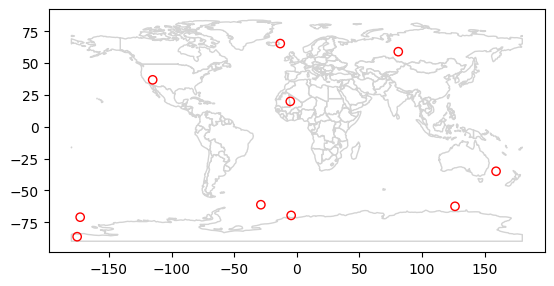

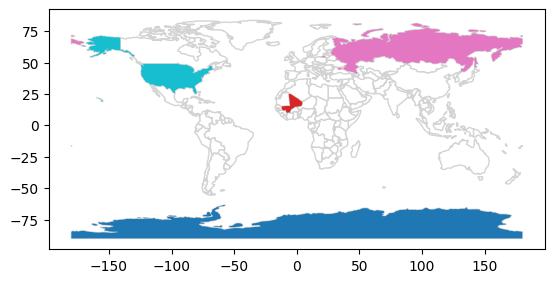

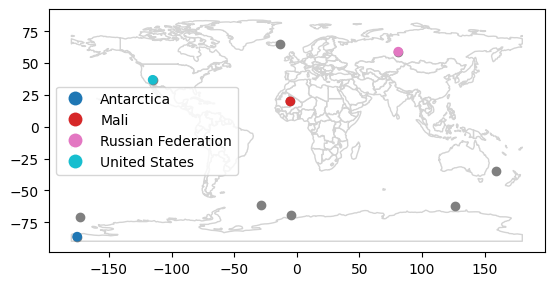

In [29]:
# Random points
base = world.plot(color='white', edgecolor='lightgrey')
random_points.plot(ax=base, color='None', edgecolor='red');
# World countries intersecting with the points
base = world.plot(color='white', edgecolor='lightgrey')
world_random.plot(ax=base, column='name_long');
# Points with joined country names
base = world.plot(color='white', edgecolor='lightgrey')
random_joined.geometry.plot(ax=base, color='grey')
random_joined.plot(ax=base, column='name_long', legend=True);

### 3.2.4 Non-overlapping joins

In [45]:
cycle_hire.describe

<bound method NDFrame.describe of       id                name              area  nbikes  nempty  \
0      1        River Street       Clerkenwell       4      14   
1      2  Phillimore Gardens        Kensington       2      34   
2      3  Christopher Street  Liverpool Street       0      32   
3      4   St. Chad's Street      King's Cross       4      19   
4      5      Sedding Street     Sloane Square      15      12   
..   ...                 ...               ...     ...     ...   
737  773       Tallis Street            Temple       0      23   
738  774     Hurlingham Park     Parsons Green      11       9   
739  775  Little Brook Green       Brook Green      16      17   
740  776     Abyssinia Close  Clapham Junction      10      10   
741  777        Limburg Road    Clapham Common       7      11   

                      geometry  
0    POINT (-0.10997 51.52916)  
1    POINT (-0.19757 51.49961)  
2    POINT (-0.08461 51.52128)  
3    POINT (-0.12097 51.53006)  
4    POI

In [44]:
cycle_hire_osm.describe

<bound method NDFrame.describe of          osm_id                        name  capacity cyclestreets_id  \
0        108539             Windsor Terrace      14.0            None   
1     598093293  Pancras Road, King's Cross       NaN            None   
2     772536185  Clerkenwell, Ampton Street      11.0            None   
3     772541878                        None       NaN            None   
4     781506147                        None       NaN            None   
..          ...                         ...       ...             ...   
535  4872955242                        None       NaN            None   
536  4872955243                        None       NaN            None   
537  5121513755                        None       5.0            None   
538  5188912370                        None       NaN            None   
539  5188912371                        None       NaN            None   

    description                   geometry  
0          None  POINT (-0.09339 51.52913)  

In [32]:
cycle_hire.head(5)

,id,name,area,nbikes,nempty,geometry
0,1,River Street,Clerkenwell,4,14,POINT (-0.10997 51.52916)
1,2,Phillimore Gardens,Kensington,2,34,POINT (-0.19757 51.49961)
2,3,Christopher Street,Liverpool Street,0,32,POINT (-0.08461 51.52128)
3,4,St. Chad's Street,King's Cross,4,19,POINT (-0.12097 51.53006)
4,5,Sedding Street,Sloane Square,15,12,POINT (-0.15688 51.49313)


In [33]:
cycle_hire_osm.head(5)

,osm_id,name,capacity,cyclestreets_id,description,geometry
0,108539,Windsor Terrace,14.0,None,None,POINT (-0.09339 51.52913)
1,598093293,"Pancras Road, King's Cross",NaN,None,None,POINT (-0.12931 51.53402)
2,772536185,"Clerkenwell, Ampton Street",11.0,None,None,POINT (-0.11824 51.52729)
3,772541878,None,NaN,None,None,POINT (-0.09084 51.52583)
4,781506147,None,NaN,None,None,POINT (-0.12106 51.53001)


<Axes: >

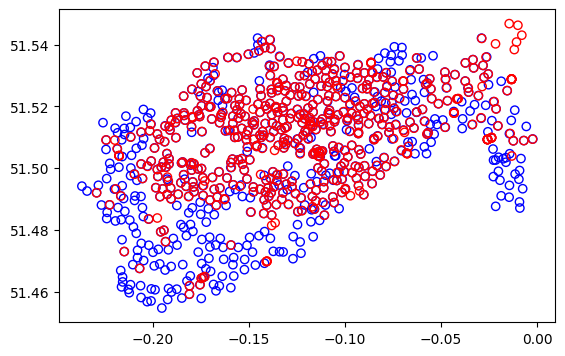

In [34]:
base = cycle_hire.plot(edgecolor='blue', color='none')
cycle_hire_osm.plot(ax=base, edgecolor='red', color='none')

In [35]:
m = cycle_hire.geometry.apply(
    lambda x: cycle_hire_osm.geometry.intersects(x)
)
m.to_numpy().any()

np.False_

In [36]:
m

,0,1,2,3,4,5,6,7,8,9,...,530,531,532,533,534,535,536,537,538,539
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
738,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
739,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
740,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
crs = 27700

cycle_hire_buffers = cycle_hire.copy().to_crs(crs)
cycle_hire_buffers.geometry = cycle_hire_buffers.buffer(20)
cycle_hire_buffers = gpd.sjoin(
    cycle_hire_buffers,
    cycle_hire_osm.to_crs(crs),
    how='left'
)
cycle_hire_buffers

,id,name_left,area,nbikes,nempty,geometry,index_right,osm_id,name_right,capacity,cyclestreets_id,description
0,1,River Street,Clerkenwell,4,14,"POLYGON ((531223.517 182832.066, 531223.421 18...",232.0,869697014,River Street,9.0,None,None
1,2,Phillimore Gardens,Kensington,2,34,"POLYGON ((525228.067 179391.922, 525227.97 179...",277.0,885331201,"Kensington, Phillimore Gardens",27.0,None,None
2,3,Christopher Street,Liverpool Street,0,32,"POLYGON ((533005.807 182001.572, 533005.711 18...",293.0,920087626,Christopher Street,NaN,None,None
3,4,St. Chad's Street,King's Cross,4,19,"POLYGON ((530457.757 182912.038, 530457.661 18...",4.0,781506147,None,NaN,None,None
4,5,Sedding Street,Sloane Square,15,12,"POLYGON ((528070.966 178742.004, 528070.87 178...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
737,773,Tallis Street,Temple,0,23,"POLYGON ((531455.032 180916.01, 531454.935 180...",504.0,4387228849,"Tallis Street, Temple",14.0,None,None
738,774,Hurlingham Park,Parsons Green,11,9,"POLYGON ((524818.028 176102.023, 524817.932 17...",NaN,NaN,NaN,NaN,NaN,NaN
739,775,Little Brook Green,Brook Green,16,17,"POLYGON ((523411.016 179020.043, 523410.92 179...",NaN,NaN,NaN,NaN,NaN,NaN
740,776,Abyssinia Close,Clapham Junction,10,10,"POLYGON ((527457.473 175077.168, 527457.377 17...",NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
cycle_hire_buffers = cycle_hire_buffers[['id', 'capacity', 'geometry']] \
    .dissolve(by='id', aggfunc='mean') \
    .reset_index()

cycle_hire_buffers.geometry = cycle_hire_buffers.centroid
cycle_hire_buffers

,id,geometry,capacity
0,1,POINT (531203.517 182832.066),9.0
1,2,POINT (525208.067 179391.922),27.0
2,3,POINT (532985.807 182001.572),NaN
3,4,POINT (530437.757 182912.038),NaN
4,5,POINT (528050.966 178742.004),NaN
...,...,...,...
737,773,POINT (531435.032 180916.01),14.0
738,774,POINT (524798.028 176102.023),NaN
739,775,POINT (523391.016 179020.043),NaN
740,776,POINT (527437.473 175077.168),NaN


### 3.2.5 Spatial aggregation

In [48]:
nz_height2 = gpd.sjoin(
    nz_height[['elevation', 'geometry']],
    nz[['Name', 'geometry']],
    how='left'
)

nz_height2

,elevation,geometry,index_right,Name
0,2723,POINT (1204142.603 5049971.287),12,Southland
1,2820,POINT (1234725.325 5048309.302),11,Otago
2,2830,POINT (1235914.511 5048745.117),11,Otago
3,3033,POINT (1259701.635 5076570.049),9,West Coast
4,2749,POINT (1378169.6 5158491.453),10,Canterbury
...,...,...,...,...
96,2797,POINT (1821014.19 5647970.666),7,Manawatu-Wanganui
97,2757,POINT (1820642.909 5648331.194),7,Manawatu-Wanganui
98,2751,POINT (1820659.873 5649488.235),2,Waikato
99,2720,POINT (1822262.592 5650428.656),2,Waikato


In [52]:
nz_height2 = nz_height2.groupby('Name')[['elevation']].mean().reset_index()
nz_height2

,Name,elevation
0,Canterbury,2994.600000
1,Manawatu-Wanganui,2777.000000
2,Marlborough,2720.000000
3,Otago,2825.000000
4,Southland,2723.000000
5,Waikato,2734.333333
6,West Coast,2889.454545


In [53]:
nz

,Name,Island,Land_area,Population,Median_income,Sex_ratio,geometry
0,Northland,North,12500.561149,175500.0,23400,0.942453,"MULTIPOLYGON (((1745493.196 6001802.169, 17405..."
1,Auckland,North,4941.572557,1657200.0,29600,0.944286,"MULTIPOLYGON (((1803822.103 5900006.143, 17914..."
2,Waikato,North,23900.036383,460100.0,27900,0.952050,"MULTIPOLYGON (((1860345.005 5859664.761, 18578..."
3,Bay of Plenty,North,12071.144689,299900.0,26200,0.928039,"MULTIPOLYGON (((2049387.29 5832785.434, 205101..."
4,Gisborne,North,8385.826619,48500.0,24400,0.934973,"MULTIPOLYGON (((2024489.357 5674919.854, 20190..."
5,Hawke's Bay,North,14137.524441,164000.0,26100,0.923838,"MULTIPOLYGON (((2024489.357 5674919.854, 20241..."
6,Taranaki,North,7254.480433,118000.0,29100,0.956936,"MULTIPOLYGON (((1740438.216 5714538.134, 17438..."
7,Manawatu-Wanganui,North,22220.608387,234500.0,25000,0.938773,"MULTIPOLYGON (((1866732.458 5664323.109, 18689..."
8,Wellington,North,8048.552772,513900.0,32700,0.933552,"MULTIPOLYGON (((1881590.326 5489434.391, 18756..."
9,West Coast,South,23245.455880,32400.0,26900,1.013907,"MULTIPOLYGON (((1557042.169 5319333.386, 15542..."


In [56]:
nz2 = pd.merge(nz[['Name', 'geometry']], nz_height2, on='Name', how='left')
nz2

,Name,geometry,elevation
0,Northland,"MULTIPOLYGON (((1745493.196 6001802.169, 17405...",NaN
1,Auckland,"MULTIPOLYGON (((1803822.103 5900006.143, 17914...",NaN
2,Waikato,"MULTIPOLYGON (((1860345.005 5859664.761, 18578...",2734.333333
3,Bay of Plenty,"MULTIPOLYGON (((2049387.29 5832785.434, 205101...",NaN
4,Gisborne,"MULTIPOLYGON (((2024489.357 5674919.854, 20190...",NaN
5,Hawke's Bay,"MULTIPOLYGON (((2024489.357 5674919.854, 20241...",NaN
6,Taranaki,"MULTIPOLYGON (((1740438.216 5714538.134, 17438...",NaN
7,Manawatu-Wanganui,"MULTIPOLYGON (((1866732.458 5664323.109, 18689...",2777.000000
8,Wellington,"MULTIPOLYGON (((1881590.326 5489434.391, 18756...",NaN
9,West Coast,"MULTIPOLYGON (((1557042.169 5319333.386, 15542...",2889.454545


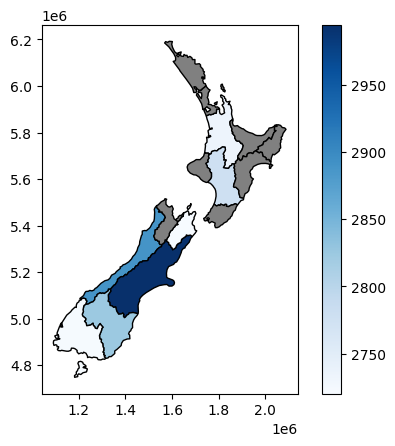

In [58]:
nz2.plot(
    column='elevation',
    legend=True,
    cmap='Blues', edgecolor='black',
    missing_kwds={'color': 'grey', 'edgecolor': 'black'}
);

In [60]:
bounds = nz.total_bounds
crs = nz.crs
res = 100000

xmin, ymin, xmax, ymax = bounds
cols = list(range(int(np.floor(xmin)), int(np.ceil(xmax+res)), res))
rows = list(range(int(np.floor(ymin)), int(np.ceil(ymax+res)), res))
rows.reverse()

polygons = []
for x in cols:
    for y in rows:
        polygons.append(
            shapely.Polygon([(x,y), (x+res, y), (x+res, y-res), (x,y-res)])
        )

grid = gpd.GeoDataFrame({'geometry':polygons}, crs=crs)

sel = grid.intersects(shapely.box(*bounds))
grid = grid[sel]

grid['id'] = grid.index
grid

,geometry,id
0,"POLYGON ((1090143 6248536, 1190143 6248536, 11...",0
1,"POLYGON ((1090143 6148536, 1190143 6148536, 11...",1
2,"POLYGON ((1090143 6048536, 1190143 6048536, 11...",2
3,"POLYGON ((1090143 5948536, 1190143 5948536, 11...",3
4,"POLYGON ((1090143 5848536, 1190143 5848536, 11...",4
...,...,...
154,"POLYGON ((1990143 5248536, 2090143 5248536, 20...",154
155,"POLYGON ((1990143 5148536, 2090143 5148536, 20...",155
156,"POLYGON ((1990143 5048536, 2090143 5048536, 20...",156
157,"POLYGON ((1990143 4948536, 2090143 4948536, 20...",157


### 3.2.6 Joining incongruent layers (on working)

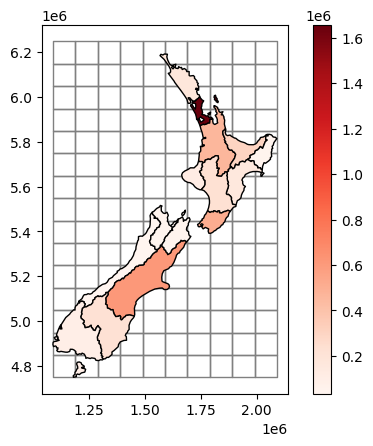

In [63]:
base = grid.plot(color='none', edgecolor='grey')
nz.plot(
    ax=base, 
    column='Population', 
    edgecolor='black', 
    legend=True, 
    cmap='Reds'
);

### 3.2.7 Distance relations

In [66]:
nz_highest = nz_height.sort_values(by='elevation', ascending=False).iloc[:3,:]
nz_highest

,t50_fid,elevation,geometry
64,2372236,3724,POINT (1369317.63 5169132.284)
63,2372235,3717,POINT (1369512.866 5168235.616)
67,2372252,3688,POINT (1369381.942 5168761.875)


In [67]:
canterbury_centroid = canterbury.centroid.iloc[0]

In [68]:
nz_highest.distance(canterbury_centroid)

64    115539.995747
63    115390.248038
67    115493.594066
dtype: float64

In [71]:
sel = nz['Name'].str.contains('Canter|Otag')
co = nz[sel]
co

,Name,Island,Land_area,Population,Median_income,Sex_ratio,geometry
10,Canterbury,South,44504.499091,612000.0,30100,0.975327,"MULTIPOLYGON (((1686901.914 5353232.66, 167999..."
11,Otago,South,31186.309188,224200.0,26300,0.951169,"MULTIPOLYGON (((1335204.789 5126878.25, 133695..."


In [72]:
d = nz_height.iloc[:3,:].apply(lambda x: co.distance(x.geometry), axis=1)
d

,10,11
0,123537.158269,15497.717252
1,94282.773074,0.000000
2,93018.560814,0.000000


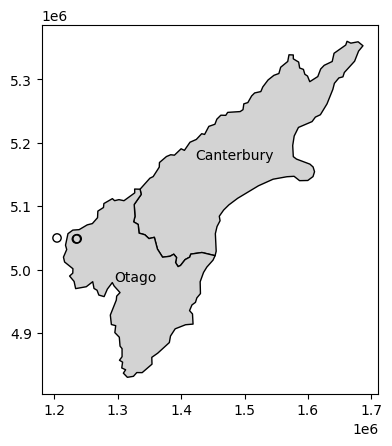

In [73]:
fig, ax = plt.subplots()
co.plot(color='lightgrey', edgecolor='black', ax=ax)
co.apply(
    lambda x: ax.annotate(
        text=x['Name'], 
        xy=x.geometry.centroid.coords[0], 
        ha='center'
    ), 
    axis=1
)
nz_height.iloc[:3, :].plot(color='none', edgecolor='black', ax=ax);

## 3.3 Spatial operations on raster data

In [74]:
src_elev.sample([(0.1, 0.1)])

<generator object sample_gen at 0x123fb81b0>

In [75]:
src_elev

<open DatasetReader name='output/elev.tif' mode='r'>

In [76]:
list(src_elev.sample([(0.1, 0.1)]))

[array([16], dtype=uint8)]

In [77]:
list(src_elev.sample([(0.1, 0.1), (1.1, 1.1)]))

[array([16], dtype=uint8), array([6], dtype=uint8)]

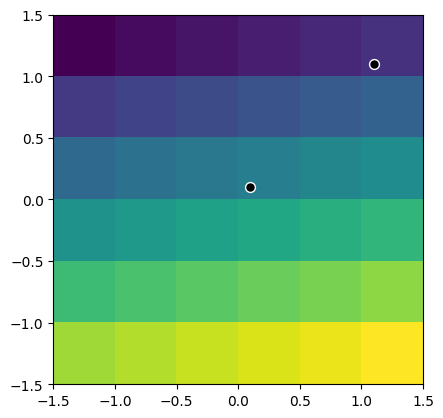

In [78]:
fig, ax = plt.subplots()
rasterio.plot.show(src_elev, ax=ax)
gpd.GeoSeries([shapely.Point(0.1, 0.1)]) \
    .plot(color='black', edgecolor='white', markersize=50, ax=ax)
gpd.GeoSeries([shapely.Point(1.1, 1.1)]) \
    .plot(color='black', edgecolor='white', markersize=50, ax=ax);

In [ ]:
elev = src_elev.read(1)
elev

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36]], dtype=uint8)

In [81]:
np.random.seed(1)
mask = np.random.choice([True, False], src_elev.shape)
mask

array([[False, False,  True,  True, False, False],
       [False, False, False,  True,  True, False],
       [ True, False, False,  True,  True, False],
       [ True,  True,  True, False,  True,  True],
       [False,  True,  True,  True, False,  True],
       [ True,  True, False, False, False, False]])

In [83]:
masked_elev = elev.copy()
masked_elev = masked_elev.astype('float64')
masked_elev[mask] = np.nan
masked_elev


array([[ 1.,  2., nan, nan,  5.,  6.],
       [ 7.,  8.,  9., nan, nan, 12.],
       [nan, 14., 15., nan, nan, 18.],
       [nan, nan, nan, 22., nan, nan],
       [25., nan, nan, nan, 29., nan],
       [nan, nan, 33., 34., 35., 36.]])

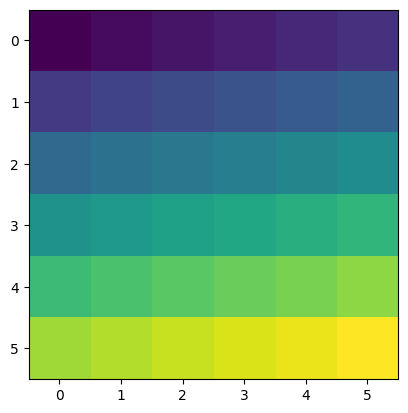

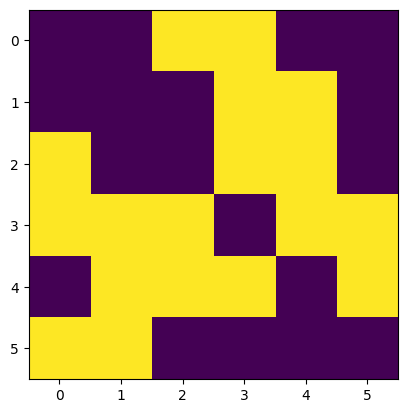

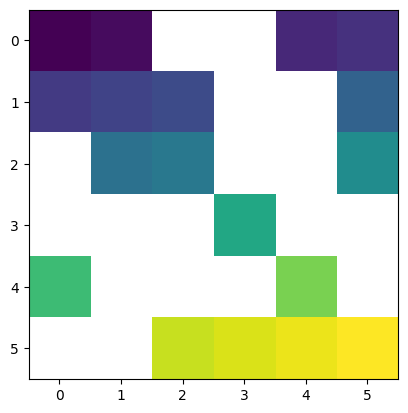

In [84]:
rasterio.plot.show(elev);
rasterio.plot.show(mask);
rasterio.plot.show(masked_elev);

### 3.3.3 Local operations (On working)